## Финальное соревнование

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

В данном задании вас ждет неизвестная зависимость. Ваша основная задача: **построить две лучших модели**, минимизирующих среднеквадратичную ошибку (MSE):
1. На первую модель не налагается ограничений.
2. Вторая модель должна быть **линейной**, т.е. представлять собой линейную комбинацию признаков плюс свободный член: $\boldsymbol{w}^{\top}\boldsymbol{x} + b$. При этом __вы можете использовать базовые математические операции для преобразования признаков__: np.exp, np.log, np.pow (полный список доступен в [документации](https://numpy.org/doc/stable/reference/routines.math.html)), а также линейные операции над ними (сумма, умножение на число и пр.). Для преобразования признаков вам будет необходимо написать функцию `my_transformation`. __Кол-во параметров (весов) используемых второй моделью не должно превышать 15 (включая свободный член).__

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в будущем писать код более уверенно

In [45]:
import os
import json

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Загрузка данных происходит ниже. Если она не срабатывает, самостоятельно скачайте файл `hw_final_open_data.npy` и положите его в ту же директорию, что и ноутбук.

In [46]:
assert os.path.exists('hw_final_open_data.npy'), 'Please, download `hw_final_open_data.npy` and place it in the working directory'
assert os.path.exists('hw_final_open_target.npy'), 'Please, download `hw_final_open_target.npy` and place it in the working directory'
data = np.load('hw_final_open_data.npy', allow_pickle=False)
target = np.load('hw_final_open_target.npy', allow_pickle=False)

Разбивка на `train` и `val` опциональна и сделана для вашего удобства.

In [47]:
train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.3)

In [48]:
closed_data = np.load('hw_final_closed_data.npy', allow_pickle=False)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [122]:
def my_transformation(feature_matrix: np.ndarray):
    new_feature_matrix = np.zeros((feature_matrix.shape[0], 5))
    new_feature_matrix[:, 0] = feature_matrix[:, 0]
    new_feature_matrix[:, 1] = feature_matrix[:, 1]
    new_feature_matrix[:, 2] = feature_matrix[:, 0] * feature_matrix[:, 0]
    new_feature_matrix[:, 3] = feature_matrix[:, 1] * feature_matrix[:, 1]
    new_feature_matrix[:, 4] = feature_matrix[:, 0] * feature_matrix[:, 1]
    return new_feature_matrix

In [123]:
data_tr = my_transformation(data)

In [124]:
data.shape

(800, 7)

In [125]:
data_tr.shape

(800, 5)

In [126]:
data_tr

array([[-0.56581437, -0.43054397,  0.3201459 ,  0.18536811,  0.24360796],
       [-0.56288042, -0.05117727,  0.31683437,  0.00261911,  0.02880668],
       [-0.56029231,  0.98737978,  0.31392747,  0.97491883, -0.5532213 ],
       ...,
       [-0.56082519,  0.6755995 ,  0.3145249 ,  0.45643468, -0.37889322],
       [-0.5615423 ,  0.35020106,  0.31532975,  0.12264078, -0.19665271],
       [-0.56452171, -0.31804566,  0.31868476,  0.10115304,  0.17954368]])

In [127]:
data

array([[-0.56581437, -0.43054397, -0.56863048, ..., -0.5274203 ,
        -0.16069121, -0.57543757],
       [-0.56288042, -0.05117727, -0.56863048, ..., -0.50633863,
         0.79560148, -0.57543757],
       [-0.56029231,  0.98737978, -0.56863048, ..., -0.48119888,
         3.24952961, -0.57543757],
       ...,
       [-0.56082519,  0.6755995 , -0.56863048, ..., -0.48700713,
         2.5261829 , -0.57543757],
       [-0.5615423 ,  0.35020106, -0.56863048, ..., -0.4942728 ,
         1.76094455, -0.57543757],
       [-0.56452171, -0.31804566, -0.56863048, ..., -0.51891584,
         0.13076355, -0.57543757]])

In [135]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", Ridge())])
param_grid = {'svm__alpha': [0.0001, 0.0005, 0.02, 0.01, 0.1, 0, 1, 10, 100]}
#param_grid = {'svm__C': [0.001, 0.01, 0.1, 0.2, 1, 10, 100, 500, 1000, 950],
#'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
#param_grid = {'svm__n_estimators': [ 100, 200, 400, 600], 'svm__min_samples_split':[5, 10, 20, 30, 40], 'svm__ccp_alpha' : [0.00001, 0.0001, 0.001, 0.01]}

In [136]:
grid = GridSearchCV(pipe,param_grid=param_grid, cv=5, verbose=10, scoring= 'neg_mean_squared_error')
grid.fit(data_tr, target)
print(
    f'train mse =\t {mean_squared_error(np.round(grid.best_estimator_.predict(data_tr), 2), np.round(target, 2)):.5f}',
)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START svm__alpha=0.0001...........................................
[CV 1/5; 1/9] END ...........svm__alpha=0.0001;, score=-0.099 total time=   0.0s
[CV 2/5; 1/9] START svm__alpha=0.0001...........................................
[CV 2/5; 1/9] END ...........svm__alpha=0.0001;, score=-0.084 total time=   0.0s
[CV 3/5; 1/9] START svm__alpha=0.0001...........................................
[CV 3/5; 1/9] END ...........svm__alpha=0.0001;, score=-0.082 total time=   0.0s
[CV 4/5; 1/9] START svm__alpha=0.0001...........................................
[CV 4/5; 1/9] END ...........svm__alpha=0.0001;, score=-0.092 total time=   0.0s
[CV 5/5; 1/9] START svm__alpha=0.0001...........................................
[CV 5/5; 1/9] END ...........svm__alpha=0.0001;, score=-0.100 total time=   0.0s
[CV 1/5; 2/9] START svm__alpha=0.0005...........................................
[CV 1/5; 2/9] END ...........svm__alpha=0.0005;, 

### Модель №1
Напоминаем, в первой части задания ваша основная задача – получить наилучший результат без ограничений на модель. Сдаваться будут только предсказания модели.

Пример с использованием Random Forest доступен ниже.

In [137]:
grid.best_score_

-0.09111302285134455

In [138]:
grid.best_params_

{'svm__alpha': 0.02}

##### Сдача первой части соревнования
Загрузите файл `hw_final_closed_data.npy` (ссылка есть на странице с заданием). Если вы используете sklearn-совместимую модель, для генерации посылки вы можете воспользоваться функцией `get_predictions`. В ином случае перепишите функцию для вашей модели и запустите код под следующей ячейкой для генерации посылки.

In [72]:
assert os.path.exists('hw_final_closed_data.npy'), 'Please, download `hw_final_closed_data.npy` and place it in the working directory'
closed_data = np.load('hw_final_closed_data.npy', allow_pickle=False)

Если необходимо, преобразуйте данные. Преобразованную матрицу объект-признак сохраните в переменную `closed_data`.

In [10]:
# optional transformations

In [75]:
def get_predictions(model, eval_data, step=10):
    predicted_values = model.predict(my_transformation(eval_data))
    return predicted_values

Обращаем ваше внимание, предсказания округляются до сотых!

In [76]:
predicted_values = np.round(get_predictions(model=grid.best_estimator_, eval_data=closed_data), 2)

assert predicted_values.shape == (closed_data.shape[0], ) # predictions should be just one-dimensional array

In [77]:
# do not change the code in the block below
# __________start of block__________
def float_list_to_comma_separated_str(_list):
    _list = list(np.round(np.array(_list), 2))
    return ','.join([str(x) for x in _list])

submission_dict = {
    'predictions': float_list_to_comma_separated_str(predicted_values)
}
with open('submission_dict_final_p01.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
    
print('File saved to `submission_dict_final_p01.npy`')
# __________end of block__________

File saved to `submission_dict_final_p01.npy`


### Модель №2
Функция `my_transformation` принимает на вход матрицу объект-признак (`numpy.ndarray` типа `np.float`) и преобразует ее в новую матрицу. Данная функция может использовать только numpy-операции, а также арифметические действия.

Для примера доступна функция ниже. Она лишь добавляет новый признак, представляющий собой произведение первого и второго исходных признаков (считая с нуля).

In [32]:
def my_transformation(feature_matrix: np.ndarray):
    new_feature_matrix = np.zeros((feature_matrix.shape[0], feature_matrix.shape[1]+3))
    new_feature_matrix[:, :feature_matrix.shape[1]] = feature_matrix
    new_feature_matrix[:, -1] = feature_matrix[:, 0] * feature_matrix[:, 1]
    new_feature_matrix[:, -2] = feature_matrix[:, 0] * feature_matrix[:, 0]
    new_feature_matrix[:, -3] = feature_matrix[:, 1] * feature_matrix[:, 1]
    return new_feature_matrix

In [33]:
transformed_train_x = my_transformation(train_x)


In [34]:
train_x.shape

(560, 7)

In [35]:
transformed_train_x.shape

(560, 10)

In [36]:
transformed_train_x

array([[-0.56384076, -0.22893074, -0.56863048, ...,  0.05240928,
         0.3179164 ,  0.12908048],
       [-0.56513085, -0.37874372, -0.56863048, ...,  0.14344681,
         0.31937288,  0.21403976],
       [-0.56031899,  0.97010124, -0.56863048, ...,  0.94109642,
         0.31395738, -0.54356615],
       ...,
       [-0.56002219,  1.17328206, -0.56863048, ...,  1.37659079,
         0.31362485, -0.65706398],
       [-0.56114558,  0.51835652, -0.56863048, ...,  0.26869348,
         0.31488436, -0.29087347],
       [-0.56705232, -0.49317654, -0.56863048, ...,  0.2432231 ,
         0.32154833,  0.2796569 ]])

In [37]:
lr = RidgeCV(alphas=(0.001, 0.01, 0.1, 1.0, 10.0), scoring='neg_mean_squared_error', cv=5)
lr.fit(transformed_train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(lr.predict(transformed_train_x), train_y):.5f}',
    f'validation mse = {mean_squared_error(lr.predict(my_transformation(valid_x)), valid_y):.5f}',
    sep='\n'
)

train mse =	 0.08342
validation mse = 0.10502


In [106]:
import pandas as pd
import seaborn as sns

<AxesSubplot:>

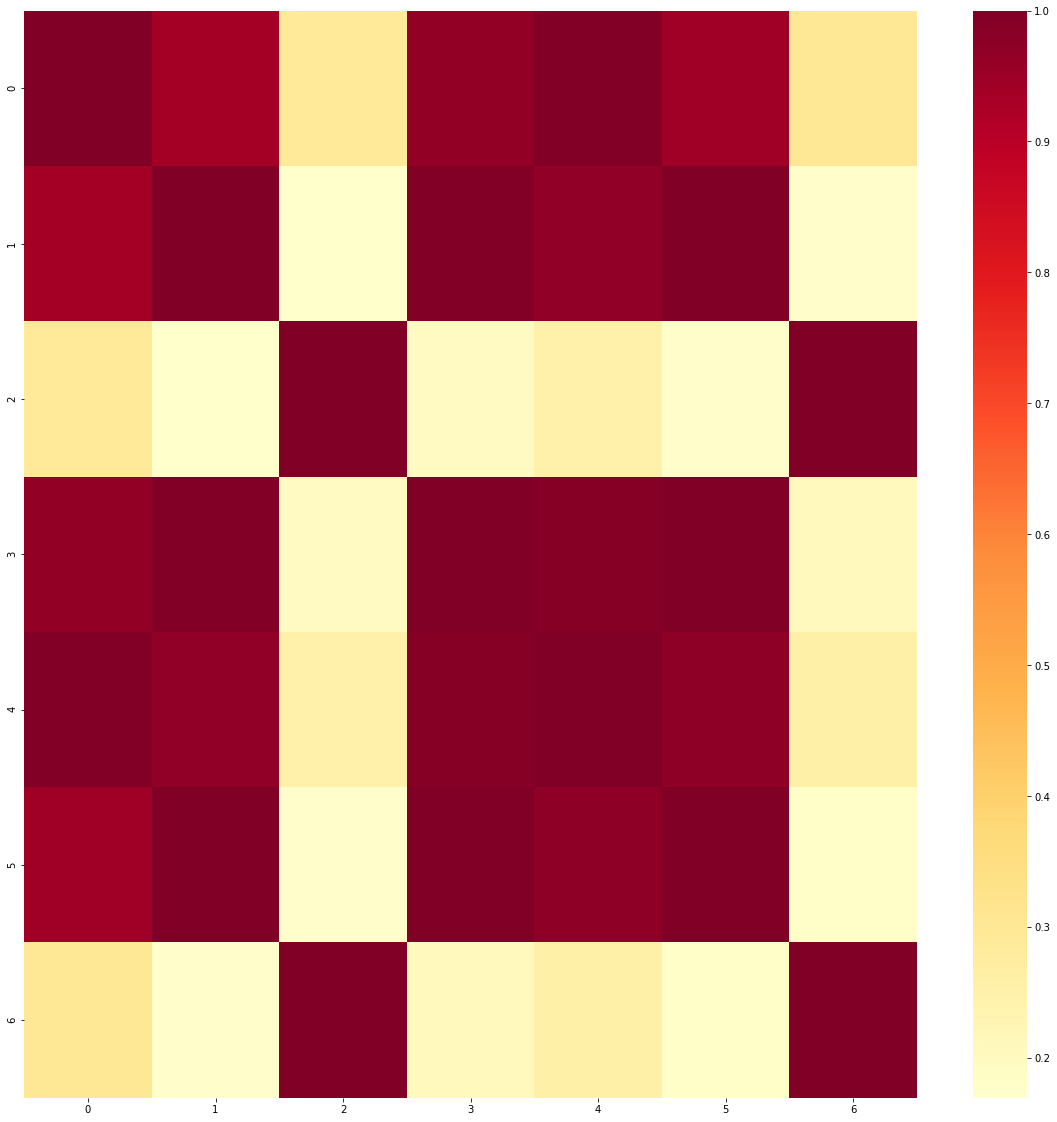

In [107]:
cr = pd.DataFrame(data)
plt.figure(figsize=[20,20])
sns.heatmap(cr.corr(), cmap = 'YlOrRd')

Обращаем ваше внимание, что параметры линейной модели будут округляться до __четырех знаков после запятой__. Это не должно сильно повлиять на качество предсказаний:

In [38]:
original_predictions = lr.predict(transformed_train_x)
rounded_predictions = transformed_train_x.dot(np.round(lr.coef_, 4)) + np.round(lr.intercept_, 4)


assert np.allclose(original_predictions, rounded_predictions, atol=1e-3)

Параметры вашей модели:

In [39]:
w_list = list(np.round(lr.coef_, 4))
print(f'w = {list(np.round(lr.coef_, 4))}\nb = {np.round(lr.intercept_, 4)}')

w = [0.0359, 0.3462, 0.0, 0.9484, 0.1899, 1.3855, 0.0, -0.086, -0.0407, -0.2226]
b = 1.6385


Напоминаем, ваша модель не должна использовать более 15 параметров (14 весов плюс свободный член).

In [19]:
assert len(w_list) + 1 <= 15

##### Сдача второй части соревнования
Для сдачи вам достаточно отправить функцию `my_transformation` и параметры вашей модели в контест в задачу №2. Пример посылки доступен ниже. Имортирование `numpy` также необходимо.

In [41]:
# __________example_submission_start__________
import numpy as np
def my_transformation(feature_matrix: np.ndarray):
    new_feature_matrix = np.zeros((feature_matrix.shape[0], feature_matrix.shape[1]+3))
    new_feature_matrix[:, :feature_matrix.shape[1]] = feature_matrix
    new_feature_matrix[:, -1] = feature_matrix[:, 0] * feature_matrix[:, 1]
    new_feature_matrix[:, -2] = feature_matrix[:, 0] * feature_matrix[:, 0]
    new_feature_matrix[:, -3] = feature_matrix[:, 1] * feature_matrix[:, 1]
    return new_feature_matrix

w_submission = [0.0359, 0.3462, 0.0, 0.9484, 0.1899, 1.3855, 0.0, -0.086, -0.0407, -0.2226]
b_submission = 1.6385
# __________example_submission_end__________

На этом задание завершено. Поздравляем!